In [10]:
from IPython.display import display, HTML

import pandas as pd
from os import listdir
from os.path import isfile, join
from pprint import pprint
from tqdm import tqdm
import json
import io

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.font_manager import FontProperties
import numpy as np
from scipy.spatial.distance import euclidean, pdist, squareform, cosine

import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


sns.set(style="ticks")
plt.rcParams['axes.facecolor']='white'
task_order = ['SST5', 'TREC', 'SICKEntailment', 'MRPC']
model_order = ['bert-base-uncased', 'bert-large-uncased', 'openai-gpt', 'gpt2', 'transfo-xl-wt103']
dict_task = {0:'Length',  1:'WordContent', 2:'Depth', 3:'TopConstituents', 4:'BigramShift', 5:'Tense', 6:'SubjNumber', 7:'ObjNumber', 8:'OddManOut', 9:'CoordinationInversion'}

def get_results(dir_path='./mlp_results'):
    columns = ['data_path', 'cache_path', 'result_path', 'batch_size', 'cbatch_size', 'nhid', 'optim', 'kfold', 'tenacity', 'usepytorch', 'epoch_size', 'device']
    filenames = [f for f in listdir(dir_path) if isfile(join(dir_path, f)) if '.json' in f]
    list_result = []
    for filename in filenames:
        with open(join(dir_path, filename), 'r') as infile:
#             print(filename)
            results = json.load(infile)
            for key, result in results.items():
                list_result.append(result)
                
    df = pd.DataFrame(list_result)[['acc', 'head', 'layer', 'task', 'model_name', 'location']]
    
    for column in columns:
        try:
            df = df.drop(columns=column)
        except:
            pass

    return df

def get_multi_head_results(dir_path='./top_head_wise_results'):
    columns = ['data_path', 'cache_path', 'result_path', 'batch_size', 'cbatch_size', 'nhid', 'optim', 'kfold', 'tenacity', 'usepytorch', 'epoch_size', 'device']
    filenames = [f for f in listdir(dir_path) if isfile(join(dir_path, f)) if '.json' in f]
    list_result = []
    for filename in filenames:
        with open(join(dir_path, filename), 'r') as infile:
#             print(filename)
            results = json.load(infile)
            for key, result in results.items():
                list_result.append(result)
                
    df = pd.DataFrame(list_result)[['acc', 'num_head', 'task', 'model_name']]
    
    for column in columns:
        try:
            df = df.drop(columns=column)
        except:
            pass

    return df

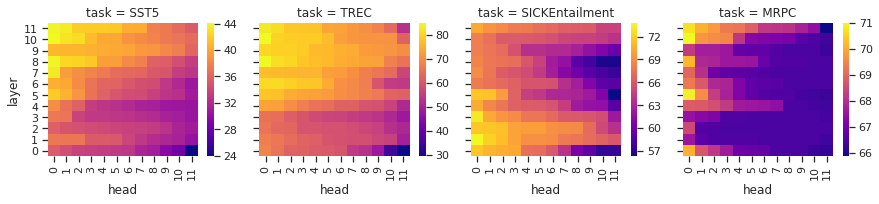

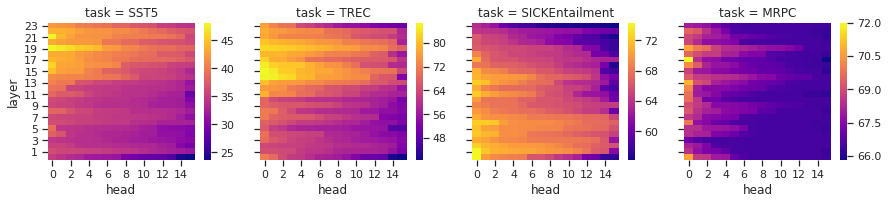

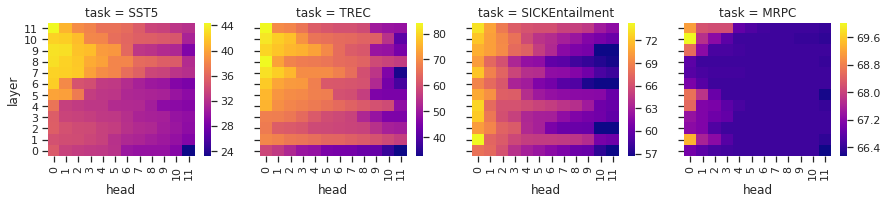

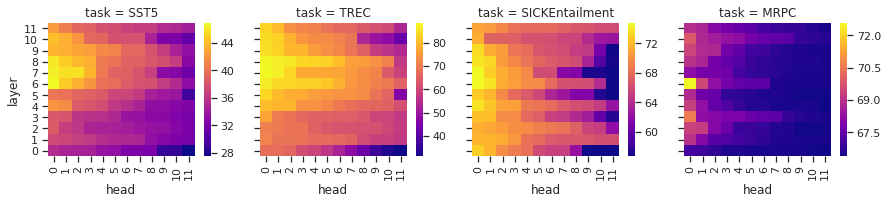

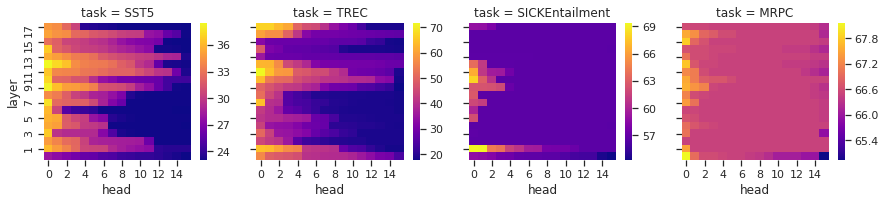

In [29]:
plt_cmap = 'plasma'# 'viridis'

def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot(index=args[1], columns=args[0], values=args[2])
    data = d.values
    data.sort(axis=1)
    d.iloc[:,:] = np.flip(data, 1)
    sns.heatmap(d[::-1], **kwargs)


    
df = get_results(dir_path='./ds_linear_head_wise_results')
df = df.loc[df['location'] == 'head']
df = df.loc[df['model_name'] == 'bert-base-uncased']
df = df.loc[df['head'] >= 0]
fg = sns.FacetGrid(df, col='task', col_wrap=10, col_order=task_order)
fg.map_dataframe(draw_heatmap, 'head', 'layer', 'acc', cbar=True, square = False, cmap=plt_cmap)

df = get_results(dir_path='./ds_linear_head_wise_results')
df = df.loc[df['location'] == 'head']
df = df.loc[df['model_name'] == 'bert-large-uncased']
df = df.loc[df['head'] >= 0]
fg = sns.FacetGrid(df, col='task', col_wrap=10, col_order=task_order)
fg.map_dataframe(draw_heatmap, 'head', 'layer', 'acc', cbar=True, square = False, cmap=plt_cmap)

df = get_results(dir_path='./ds_linear_head_wise_results')
df = df.loc[df['location'] == 'head']
df = df.loc[df['model_name'] == 'openai-gpt']
df = df.loc[df['head'] >= 0]
fg = sns.FacetGrid(df, col='task', col_wrap=10, col_order=task_order)
fg.map_dataframe(draw_heatmap, 'head', 'layer', 'acc', cbar=True, square = False, cmap=plt_cmap)

df = get_results(dir_path='./ds_linear_head_wise_results')
df = df.loc[df['location'] == 'head']
df = df.loc[df['model_name'] == 'gpt2']
df = df.loc[df['head'] >= 0]
fg = sns.FacetGrid(df, col='task', col_wrap=10, col_order=task_order)
fg.map_dataframe(draw_heatmap, 'head', 'layer', 'acc', cbar=True, square = False, cmap=plt_cmap)

df = get_results(dir_path='./ds_linear_head_wise_results')
df = df.loc[df['location'] == 'head']
df = df.loc[df['model_name'] == 'transfo-xl-wt103']
df = df.loc[df['head'] >= 0]
fg = sns.FacetGrid(df, col='task', col_wrap=10, col_order=task_order)
fg.map_dataframe(draw_heatmap, 'head', 'layer', 'acc', cbar=True, square = False, cmap=plt_cmap)

In [34]:
# Find last layer performance 
df = get_results(dir_path='./ds_linear_head_wise_results')
df = df.loc[df['head'] == -1]
df_base = df.loc[(df['layer'] == 11) & (df['model_name'] == 'bert-base-uncased')]
df_large = df.loc[(df['layer'] == 23) & (df['model_name'] == 'bert-large-uncased')]
df_gpt = df.loc[(df['layer'] == 11) & (df['model_name'] == 'openai-gpt')]
df_gpt2 = df.loc[(df['layer'] == 11) & (df['model_name'] == 'gpt2')]
df_xl = df.loc[(df['layer'] == 17) & (df['model_name'] == 'transfo-xl-wt103')]

df_last_linear = pd.concat([df_base, df_large, df_gpt, df_gpt2, df_xl])
df_last_linear = df_last_linear.set_index(['task', 'model_name'])
df_last_linear = df_last_linear.sort_index()
df_last_linear['last_linear_layer'] = df_last_linear['acc']
df_last_linear = df_last_linear.drop(columns=['acc']).round(1)



# Find best layer performance
df = get_results(dir_path='./ds_linear_head_wise_results')
df = df.loc[df['head'] == -1]
df = pd.DataFrame(df.groupby(['task', 'model_name'])['acc'].max())
df['best_linear_layer'] = df['acc']
df_best_linear = df.drop(columns=['acc'])
# display(df)

df_last_linear = pd.concat([df_base, df_large, df_gpt, df_gpt2, df_xl])
df_last_linear = df_last_linear.set_index(['task', 'model_name'])
df_last_linear = df_last_linear.sort_index()
df_last_linear['last_linear_layer'] = df_last_linear['acc']
df_last_linear = df_last_linear.drop(columns=['acc'])

# Find top n head performance
df = get_multi_head_results(dir_path='./ds_top_head_wise_results')
df_base = df.loc[(df['num_head'] == 12) & (df['model_name'] == 'bert-base-uncased')]
df_large = df.loc[(df['num_head'] == 16) & (df['model_name'] == 'bert-large-uncased')]
df_gpt = df.loc[(df['num_head'] == 12) & (df['model_name'] == 'openai-gpt')]
df_gpt2 = df.loc[(df['num_head'] == 12) & (df['model_name'] == 'gpt2')]
df_xl = df.loc[(df['num_head'] == 16) & (df['model_name'] == 'transfo-xl-wt103')]

df = pd.concat([df_base, df_large, df_gpt, df_gpt2, df_xl])


df = df.set_index(['task', 'model_name'])
df = df.sort_index()
df['top_n_head'] = df['acc']
df_top_n_head = df.drop(columns=['acc'])

result = pd.concat([df_last_linear, df_best_linear, df_top_n_head], axis=1)
result = result.drop(columns=['head', 'layer', 'num_head', 'location'])
result['enhancement'] = round((result['top_n_head'] - result['best_linear_layer']) /  result['best_linear_layer'] * 100, 2)
result['top_n_head2'] = ''

for i, row in result.iterrows():
    result.at[i, 'top_n_head2'] =  '{:1.1f} ({:1.1f})'.format(row[2], row[3])
result['top_n_head'] = result['top_n_head2']
result = result.drop(columns=['enhancement', 'top_n_head2'])

# result = result.dropna()

result = result.reindex(task_order, level=0)
result = result.reindex(model_order, level=1)

display(result.round(1))
result.to_csv('ds.csv')

last_linear_layer  best_linear_layer  \
task           model_name                                                 
SST5           bert-base-uncased                46.4               47.0   
               bert-large-uncased               49.0               49.0   
               openai-gpt                       45.4               46.1   
               gpt2                             41.3               45.3   
               transfo-xl-wt103                 42.5               42.5   
TREC           bert-base-uncased                87.4               87.4   
               bert-large-uncased               88.8               91.8   
               openai-gpt                       82.4               83.6   
               gpt2                             89.8               90.8   
               transfo-xl-wt103                 72.2               72.2   
SICKEntailment bert-base-uncased                61.9               68.2   
               bert-large-uncased               67.5               75.1   
               openai-gpt                       76.6               76.6   
               gpt2                             63.7               71.5   
               transfo-xl-wt103                 66.4               70.0   
MRPC           bert-base-uncased                66.5               70.8   
               bert-large-uncased               68.2               73.3   
               openai-gpt                       66.5               71.3   
               gpt2                             68.2               69.9   
               transfo-xl-wt103                 69.0               70.0   

                                    top_n_head  
task           model_name                       
SST5           bert-base-uncased   46.0 (-2.1)  
               bert-large-uncased   51.2 (4.5)  
               openai-gpt           49.2 (6.7)  
               gpt2                 47.7 (5.3)  
               transfo-xl-wt103     44.5 (4.7)  
TREC           bert-base-uncased    93.4 (6.9)  
               bert-large-uncased   94.4 (2.8)  
               openai-gpt           91.6 (9.6)  
               gpt2                 94.4 (4.0)  
               transfo-xl-wt103    87.8 (21.6)  
SICKEntailment bert-base-uncased   78.9 (15.7)  
               bert-large-uncased   78.5 (4.5)  
               openai-gpt           79.5 (3.7)  
               gpt2                79.9 (11.8)  
               transfo-xl-wt103     75.8 (8.2)  
MRPC           bert-base-uncased   66.5 (-6.0)  
               bert-large-uncased   75.9 (3.5)  
               openai-gpt           72.5 (1.7)  
               gpt2                 71.0 (1.5)  
               transfo-xl-wt103    68.2 (-2.5)

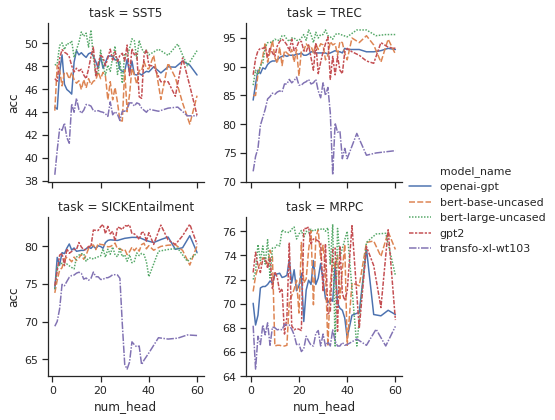

In [47]:


# Find top n head performance
df = get_multi_head_results(dir_path='./ds_top_head_wise_results')
# df = df.loc[(df['model_name'] == 'openai-gpt') | (df['model_name'] == 'bert-base-uncased') | (df['model_name'] == 'bert-large-uncased')]
df = df.loc[df['num_head'] <= 60]

g = sns.relplot(x='num_head', y='acc', hue='model_name', style='model_name', col='task', col_wrap=2, data=df, kind='line', facet_kws={'sharey':False}, height=3, legend='full')
g.savefig('effect_n_head.png')

